<a href="https://colab.research.google.com/github/anamunoz01/PROYECTO-INTEGRADOR-III/blob/main/ValidacionCruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MODELO PREDICTIVO DE ATAQUES AL CORAZÓN CON REDES NEURONALES** 

**Proyecto Integrador III**

- Elena Gómez

- Ana Muñoz

- Inés Sánchez

- Miriam Toledo


## **Objetivo**

Vamos a predecir la posibilidad de sufrir un ataque al corazón dependiendo de diferentes características relacionadas con la salud del paciente.  

Para ello creamos un modelo de clasificación binaria, con el que obtendremos una salida que será 0 o 1.
- 0 significará que la probabilidad de sufrir un ataque al corazón es muy baja.
-1 será el caso contrario, es decir, que la probabilidad es alta.

La base de datos que utilizaremos la encontramos en kaggle.com, como Health care: Heart attack possibility. 

Las características que vamos a estudiar son las siguientes:
1. Edad
2. Sexo
3. Tipo de dolor de pecho (4 tipos)
4. Presión en sangre
5. Colesterol en mg/dl
6. Azúcar en sangre > 120 mg/dl
7. Resultado electrocardiograma (valores 0, 1, 2)
8. Frecuencia cardiaca máxima alcanzada
9. Angina de pecho (inducida por el ejercicio)
10. Depresión del ST inducida por el ejercicio en relación con el reposo
11. La pendiente del segmento ST máximo del ejercicio
12. Número de vasos mayores (0-3) coloreados por la fluoroscopia
13. thal: 0 = normal; 1 = defecto fijo; 2 = defecto reversible
14. objetivo: 0= menos posibilidades de infarto 1= más posibilidades de infarto

## **Estudio y análisis de datos**

In [1]:
import keras
keras.__version__

'2.8.0'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('dataset heart attack.xlsx')


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


GRAFICAS

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Creamos dos dataframes nuevos separando variables numéricas de categóricas 

In [5]:
continuas = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
continuas

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


Normalizamos las continuas

In [6]:
mean = continuas.mean(axis=0)
#print(mean)
#continuas -= mean
std = continuas.std(axis=0)
#print(std)
continuas /= std

continuas

,age,trestbps,chol,thalach,oldpeak
0,6.936721,8.267694,4.495401,6.548742,1.980923
1,4.073947,7.412415,4.823391,8.164099,3.014448
2,4.514374,7.412415,3.935887,7.509225,1.205779
3,6.165974,6.842230,4.553282,7.771174,0.689017
4,6.276081,6.842230,6.829922,7.116300,0.516762
...,...,...,...,...,...
298,6.276081,7.982601,4.649749,5.369969,0.172254
299,4.954801,6.272044,5.093501,5.762893,1.033525
300,7.487254,8.210676,3.723658,6.155818,2.928321
301,6.276081,7.412415,2.527457,5.020703,1.033525


In [7]:
clases = df[['sex', 'fbs', 'exang', 'cp', 'restecg', 'slope', 'ca', 'thal']]
clases

,sex,fbs,exang,cp,restecg,slope,ca,thal
0,1,1,0,3,0,0,0,1
1,1,0,0,2,1,0,0,2
2,0,0,0,1,0,2,0,2
3,1,0,0,1,1,2,0,2
4,0,0,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,1,0,3
299,1,0,0,3,1,1,0,3
300,1,1,0,0,1,1,2,3
301,1,0,1,0,1,1,1,3


Vectorizamos las variables categóricas y las unimos al dataframe con las variables continuas ya normalizadas

In [8]:

normalizado = continuas
for i in clases:
  y = pd.get_dummies(df[i] ,prefix = i)
  #print(y)
  normalizado = normalizado.join(y)


normalizado = normalizado.join(df['target'])
normalizado 

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,fbs_0,fbs_1,exang_0,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,6.936721,8.267694,4.495401,6.548742,1.980923,0,1,0,1,1,...,1,0,0,0,0,0,1,0,0,1
1,4.073947,7.412415,4.823391,8.164099,3.014448,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,1
2,4.514374,7.412415,3.935887,7.509225,1.205779,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
3,6.165974,6.842230,4.553282,7.771174,0.689017,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,1
4,6.276081,6.842230,6.829922,7.116300,0.516762,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,6.276081,7.982601,4.649749,5.369969,0.172254,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
299,4.954801,6.272044,5.093501,5.762893,1.033525,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
300,7.487254,8.210676,3.723658,6.155818,2.928321,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,0
301,6.276081,7.412415,2.527457,5.020703,1.033525,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [9]:
from keras.utils.np_utils import to_categorical

In [10]:
train_data = normalizado.sample(frac=0.8,random_state=0)
# El resto de datos los almacenamos en test_data:
test_data = normalizado.drop(train_data.index)

In [11]:
train_data

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,fbs_0,fbs_1,exang_0,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
225,7.707468,8.267694,3.357080,5.457285,2.239304,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
152,7.046828,9.693159,4.379639,6.767034,0.516762,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,1
228,6.496294,9.693159,5.556547,6.941667,0.172254,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
201,6.606401,7.127323,4.977740,6.155818,2.411558,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
52,6.826614,7.412415,4.456814,6.374109,1.550287,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,6.606401,5.815895,6.135354,6.985325,0.000000,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,1
285,5.064907,7.982601,6.000299,5.238994,1.550287,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
11,5.285121,7.412415,5.305731,6.068501,0.172254,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
119,5.064907,7.868564,4.688336,6.636059,0.000000,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [12]:
train_labels = train_data.pop('target')
test_labels = test_data.pop('target')

##Creamos la red

In [20]:
import numpy as np


def val_cruzada(modelo):

    num_val_samples = len(train_data) // k
    print("num_val_samples", num_val_samples)
    k = 3
    num_epochs = 100
    loss_scores = []
    acc_scores = []
    for i in range(k):
        print('processing fold #', i)
        # Preparamos la validación de los datos: datos de la partición #k
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

        # Preparamos los datos de entrenamiento: Datos de las demás particiones
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_labels = np.concatenate(
            [train_labels[:i * num_val_samples],
            train_labels[(i + 1) * num_val_samples:]],
            axis=0)

        # Construcción del modelo Keras (ya compilado)
        model = modelo
        # Entrenando el modelo (en modo silencioso, verbose=0)
        model.fit(partial_train_data, partial_train_labels,
                  epochs=num_epochs, batch_size=1, verbose=0)
        # Evalua el modelo sobre los datos de validación
        loss, acc = model.evaluate(val_data, val_labels, verbose=0)
        loss_scores.append(loss)
        acc_scores.append(acc)

        return(loss_scores, acc_scores)

In [21]:
import tensorflow as tf

from keras import models
from keras import layers

modelo1 = models.Sequential()
modelo1.add(layers.Dense(16, activation='relu', input_shape=(30,)))
modelo1.add(layers.Dense(16, activation='relu'))
modelo1.add(layers.Dense(1, activation='sigmoid'))

DATOS VALIDACION

In [22]:
modelo1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
[x, y] = val_cruzada(modelo1)

num_val_samples 80
processing fold # 0


In [24]:
print(x, y)

#np.mean(all_scores)

[0.9823125600814819] [0.824999988079071]


In [ ]:

# Lo entrenamos en todos los datos.
test_loss, test_acc = modelo1.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 9ms/step - loss: 1.8471 - accuracy: 0.7705


In [ ]:
predicciones = model.predict(test_data)
print(predicciones)

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

[[9.9539560e-01]
 [1.0000000e+00]
 [1.0993693e-03]
 [9.9998868e-01]
 [9.9999797e-01]
 [9.9979109e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9891245e-01]
 [9.0629677e-04]
 [9.9699032e-01]
 [1.0000000e+00]
 [9.7908574e-01]
 [1.0000000e+00]
 [4.4482663e-01]
 [1.0000000e+00]
 [2.6639619e-01]
 [1.0000000e+00]
 [9.9999988e-01]
 [9.9998152e-01]
 [9.9999917e-01]
 [1.0000000e+00]
 [6.1307698e-01]
 [3.6731839e-02]
 [9.9998057e-01]
 [9.9986720e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.9433748e-02]
 [1.0000000e+00]
 [1.2659006e-03]
 [3.2338132e-19]
 [9.4037354e-01]
 [4.6061813e-26]
 [9.6428055e-01]
 [3.9841797e-12]
 [2.0221027e-05]
 [5.1147185e-06]
 [3.7071182e-08]
 [4.1592675e-22]
 [5.5548419e-08]
 [4.1797557e-07]
 [9.6107262e-01]
 [3.4803393e-18]
 [3.3067360e-10]
 [1.9379811e-17]
 [5.7759337e-07]
 [1.5395393e-17]
 [9.9999964e-01]
 [8.5750964e-20]
 [1.8262385e-03]
 [9.9921739e-01]
 [1.0871765e-02]
 [3.3912670e-03]
 [9.9999964e-01]
 [1.0000000e+00]
 [9.8795217e-01]
 [8.9037022e-2

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]])

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical

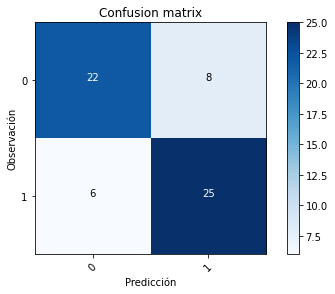

In [ ]:

ytrue = test_labels.tolist()

confusion_mtx = confusion_matrix(ytrue, clasificacion) 
plot_confusion_matrix(confusion_mtx, classes = range(2))

NUEVO

In [ ]:
modelADA = models.Sequential()
modelADA.add(layers.Dense(16, activation='relu', input_shape=(30,)))
modelADA.add(layers.Dense(16, activation='relu'))
modelADA.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
modelADA.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import numpy as np

k = 3
num_val_samples = len(train_data) // k
print("num_val_samples", num_val_samples)
num_epochs = 100
all_acc = []
all_loss = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de las demás particiones
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_labels = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = modelADA
    # Entrenando el modelo (en modo silencioso, verbose=0)
    model.fit(partial_train_data, partial_train_labels,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evalua el modelo sobre los datos de validación
    loss, acc = model.evaluate(val_data, val_labels, verbose=0)
    all_acc.append(acc)
    all_loss.append(loss)

num_val_samples 80
processing fold # 0
processing fold # 1
processing fold # 2


In [ ]:
print(np.mean(all_acc))
print(np.mean(all_loss))

0.837499996026357
0.40486674507459003


In [ ]:
# Lo entrenamos en todos los datos.
test_lossADA, test_accADA = model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 8ms/step - loss: 0.3827 - accuracy: 0.8197


In [ ]:
prediccionesADA = modelADA.predict(test_data)
print(prediccionesADA)

# Clasificación predicha
# ==============================================================================
clasificacionADA = np.where(prediccionesADA<0.5, 0, 1)
clasificacionADA

[[0.76982594]
 [0.87916297]
 [0.7751682 ]
 [0.8497052 ]
 [0.73694474]
 [0.65863335]
 [0.89474446]
 [0.6529285 ]
 [0.8911485 ]
 [0.81712   ]
 [0.23024176]
 [0.80656886]
 [0.9029481 ]
 [0.7683575 ]
 [0.8218725 ]
 [0.56657124]
 [0.8894961 ]
 [0.38660395]
 [0.81944335]
 [0.882517  ]
 [0.73665893]
 [0.7879816 ]
 [0.91952443]
 [0.5880868 ]
 [0.39975083]
 [0.9028909 ]
 [0.86520106]
 [0.8764077 ]
 [0.9104443 ]
 [0.7715998 ]
 [0.8554649 ]
 [0.07098661]
 [0.11756054]
 [0.7406881 ]
 [0.0587722 ]
 [0.85886586]
 [0.4952889 ]
 [0.5785898 ]
 [0.20046882]
 [0.25589934]
 [0.04216212]
 [0.06577433]
 [0.31891078]
 [0.12512137]
 [0.09126904]
 [0.08291975]
 [0.20405984]
 [0.04603991]
 [0.08446155]
 [0.0796111 ]
 [0.12044947]
 [0.3914853 ]
 [0.69947755]
 [0.53242004]
 [0.6167703 ]
 [0.7716782 ]
 [0.75871855]
 [0.11555858]
 [0.08916452]
 [0.14992733]
 [0.07454503]]


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

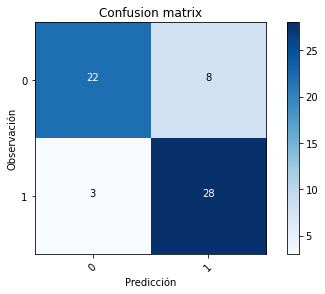

In [ ]:

ytrue = test_labels.tolist()

confusion_mtxADA = confusion_matrix(ytrue, clasificacionADA) 
plot_confusion_matrix(confusion_mtxADA, classes = range(2))